In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Nadam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from datetime import datetime

In [4]:
df1 = pd.read_csv("Updated_Houses.csv", encoding = "utf-8")

In [5]:
df1.head

<bound method NDFrame.head of        district      city  floor       price  rooms     sq  year  \
0       Mokotów  Warszawa      2  1925000.00      2  71.00  2008   
1      Grunwald    Poznań      3   459000.00      2  43.39  1900   
2      Grunwald    Poznań      2   459000.00      2  43.38  1900   
3      Grunwald    Poznań      3   880000.00      3  91.88  1900   
4      Grunwald    Poznań      3   880000.00      3  91.88  1900   
...         ...       ...    ...         ...    ...    ...   ...   
37602      Wola  Warszawa      2   749541.60      2  45.24  2021   
37603   Mokotów  Warszawa      9  1300077.00      4  73.50  2021   
37604    Bemowo  Warszawa      0   857034.00      3  53.00  2010   
37605    Włochy  Warszawa      4  1321866.00      3  71.00  2017   
37606   Ursynów  Warszawa      2   878532.48      3  63.00  1978   

       price_per_sq update_date  \
0          27113.00  2024-07-04   
1          10578.00  2024-07-04   
2          10581.00  2024-07-04   
3           9

In [8]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sq)
        st = np.std(subdf.price_per_sq)
        reduced_df = subdf[(subdf.price_per_sq>(m-st)) & (subdf.price_per_sq <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df2 = remove_outliers(df1)

In [9]:
df2.shape

(29885, 10)

In [10]:
df2.isnull().sum()

district            0
city                0
floor               0
price               0
rooms               0
sq                  0
year                0
price_per_sq        0
update_date         0
offer_url       16681
dtype: int64

In [13]:
print(f'Krk:{len(df2[df2.city == "Kraków"].district.unique())}')
print(f'WWa:{len(df2[df2.city == "Warszawa"].district.unique())}')
print(f'Pzn:{len(df2[df2.city == "Poznań"].district.unique())}')

Krk:18
WWa:18
Pzn:5


In [35]:
districts = np.sort(df2[(df2.city == "Kraków")].district.unique())

In [36]:
districts

array(['Bieńczyce', 'Bieżanów-Prokocim', 'Bronowice', 'Czyżyny',
       'Dębniki', 'Grzegórzki', 'Krowodrza', 'Mistrzejowice', 'Nowa Huta',
       'Podgórze', 'Podgórze Duchackie', 'Prądnik Biały',
       'Prądnik Czerwony', 'Stare Miasto', 'Swoszowice',
       'Wzgórza Krzesławickie', 'Zwierzyniec', 'Łagiewniki-Borek Fałęcki'],
      dtype=object)

In [37]:
dummies = pd.get_dummies(df2.city)
df3 = pd.concat([df2,dummies],axis='columns')
df3.head(4)

,district,city,floor,price,rooms,sq,year,price_per_sq,update_date,offer_url,Kraków,Poznań,Warszawa
0,Prądnik Biały,Kraków,4,749000.0,2,42.01,2023,17829.0,2024-07-04,https://www.otodom.pl/pl/oferta/2-pokoje-widok...,True,False,False
1,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/wyjatkowe-mies...,True,False,False
2,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,True,False,False
3,Podgórze Duchackie,Kraków,8,655000.0,2,36.50,2023,17945.0,2024-07-04,https://www.otodom.pl/pl/oferta/gotowe-dwustro...,True,False,False


In [39]:
dummies = pd.get_dummies(df2.district)
df3 = pd.concat([df3,dummies],axis='columns')
df3.head(4)

,district,city,floor,price,rooms,sq,year,price_per_sq,update_date,offer_url,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,Prądnik Biały,Kraków,4,749000.0,2,42.01,2023,17829.0,2024-07-04,https://www.otodom.pl/pl/oferta/2-pokoje-widok...,...,False,False,False,False,False,False,False,False,False,False
1,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/wyjatkowe-mies...,...,False,False,False,False,False,False,False,False,False,False
2,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,...,False,False,False,False,False,False,False,False,False,False
3,Podgórze Duchackie,Kraków,8,655000.0,2,36.50,2023,17945.0,2024-07-04,https://www.otodom.pl/pl/oferta/gotowe-dwustro...,...,False,False,False,False,False,False,False,False,False,False


In [43]:
X = df3.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns

In [44]:
y = df3.price

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [49]:
def change_weight(column_name, new_weight):
    index = np.where(X.columns==column_name)[0][0]
    weights[index] = new_weight

# Próbka dla wyższych wag miast
def cities_sample(weight_value):
    for city in ["Kraków", "Warszawa","Poznań"]:
        change_weight(city, weight_value) 

# Próbka dla wyższych wag dzielnic
def districts_sample(weight_value):
    for index in range(7, len(X.columns)):
        weights[index] = weight_value   

# Próbka dla wyższych wag parametrów
def params_sample(weight_value):
    for index in range(0, 4):
        weights[index] = weight_value

# Próbka dla wyższej wagi wybranego parametru
def param_sample(weight_value, param_name):
    index = np.where(X.columns==param_name)[0][0]
    weights[index] = weight_value

In [53]:
weights = [1 for i in range(len(X_train.columns))]
param_sample(7, "year")
param_sample(0.1, "rooms")
districts_sample(5)


current_weights = np.array(weights) 
sample_weights = np.dot(X_train, current_weights)
sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)

# Definicja modelu artificial neural network
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
# Kompilowanie modelu

ann_model.compile(optimizer=Nadam(), loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

test_loss, test_mse, test_mae = ann_model.evaluate(X_test, y_test)

# Sprawdzanie wyniku modelu
y_pred = ann_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12884682844667904.0000 - mae: 831370.6250 - mse: 912650469376.0000 - val_loss: 3236347246542848.0000 - val_mae: 285022.5938 - val_mse: 229174689792.0000
Epoch 2/300
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2916778057400320.0000 - mae: 278381.8750 - mse: 205888929792.0000 - val_loss: 2601019846426624.0000 - val_mae: 285525.3750 - val_mse: 184293408768.0000
Epoch 3/300
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2654146712829952.0000 - mae: 286236.0938 - mse: 187664302080.0000 - val_loss: 2574307028893696.0000 - val_mae: 289482.3438 - val_mse: 182422994944.0000
Epoch 4/300
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2774422171680768.0000 - mae: 291952.4375 - mse: 195960438784.0000 - val_loss: 2524905778184192.0000 - val_mae: 277267.4688 - val_mse: 178882461696.0000
Epoch 5/300
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2739168543244288.0000 - mae: 282233.2812 - mse: 193489895424.0000 - val_loss: 24855378

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


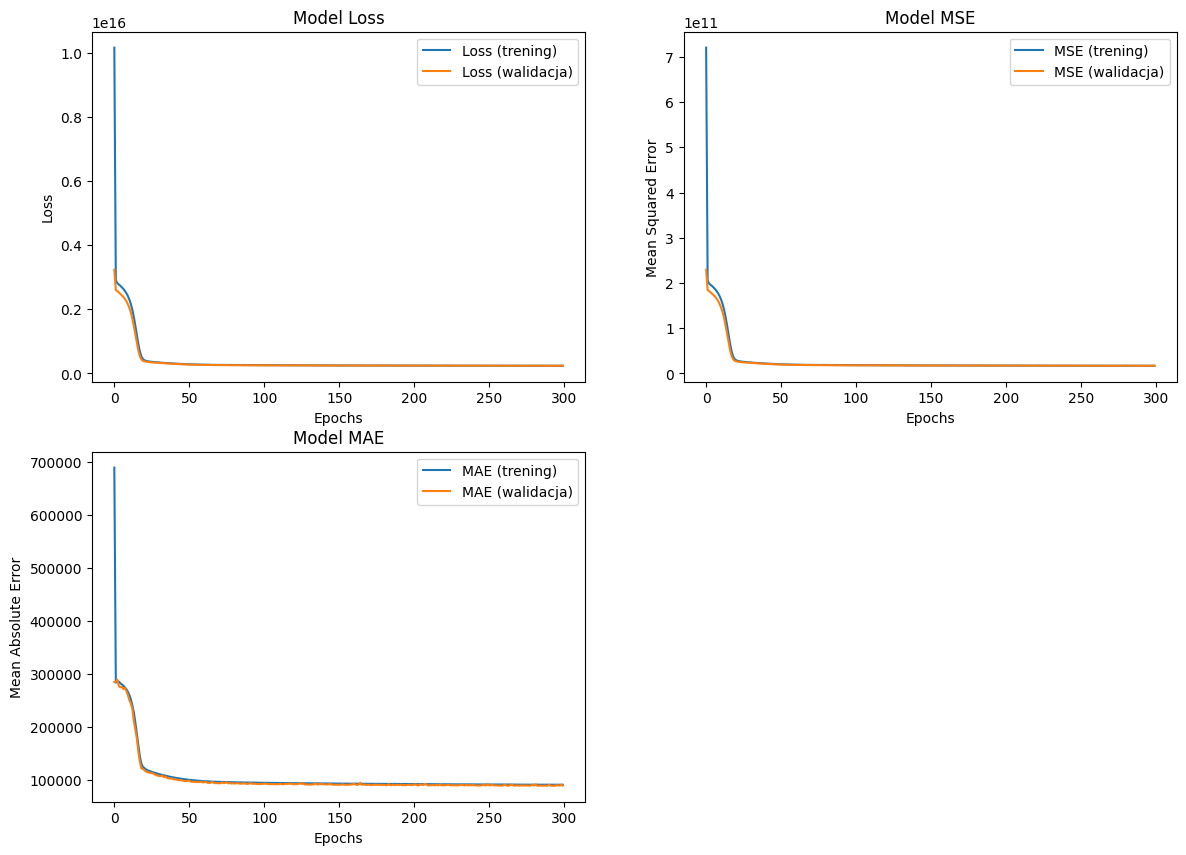

In [55]:
import matplotlib.pyplot as plt

# Sprawdź dostępne klucze w history.history
print(history.history.keys())

# Wykres dla strat i metryk
plt.figure(figsize=(14, 10))

# Wykres Loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss (trening)')
plt.plot(history.history['val_loss'], label='Loss (walidacja)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Wykres MSE
plt.subplot(2, 2, 2)
plt.plot(history.history['mse'], label='MSE (trening)')
plt.plot(history.history['val_mse'], label='MSE (walidacja)')
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# Wykres MAE
plt.subplot(2, 2, 3)
plt.plot(history.history['mae'], label='MAE (trening)')
plt.plot(history.history['val_mae'], label='MAE (walidacja)')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [58]:
# import pickle
# with open('house_prices_ann_model.pickle', 'wb') as f:
#    pickle.dump(ann_model, f)